In [20]:
# Packages nécessaires

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import pandas as pd

#importer les packages kmeans
from sklearn.cluster  import KMeans
from sklearn.preprocessing import StandardScaler


## I/ Introduction

L’industrie automobile en France, avec des marques emblématiques telles que Citroën, Peugeot et Renault, se distingue par son innovation constante et sa capacité à répondre aux défis techniques et environnementaux. La conception de véhicules implique une compréhension approfondie de diverses caractéristiques techniques et de leur impact sur les performances et le coût des véhicules.
Dans ce contexte dynamique, notre projet vise à explorer les relations complexes entre divers modèles de véhicules à partir d'un ensemble de données comprenant des variables telles que le modèle, le nombre de cylindres, la puissance, les dimensions, le poids, la vitesse maximale, la finition, le prix et le ratio poids/puissance. L'objectif de cette étude est double. Tout d’abord nous utiliserons l'Analyse en Composantes Principales (ACP) combinée à l'algorithme de K-means, pour réduire la dimensionnalité des données tout en préservant au mieux les informations essentielles. Cette approche permettra d’identifier les principales dimensions qui définissent la variabilité entre les modèles de véhicules et de regrouper les modèles similaires en clusters distincts. Ces clusters pourraient fournir des insights précieux sur la segmentation des modèles de véhicules en fonction de leurs caractéristiques.
Les résultats de cette analyse auront des implications significatives pour la conception de nouveaux modèles, la tarification sur le marché, ainsi que pour les consommateurs cherchant à évaluer la valeur potentielle d’un véhicule en fonction de ses spécifications.
Cette étude offre ainsi une contribution précieuse à l’industrie automobile, en combinant des techniques statistiques et d'apprentissage automatique pour mieux comprendre et exploiter les données relatives aux véhicules.

### Origine des données

Les données sont issues du site de kaggle.

Source : https://www.kaggle.com/code/zoupet/acp-classification-enonc/input

### Description des variables

Modele : Nom du modèle de voiture.

CYL (Cylindrée) : Capacité du moteur en centimètres cubes (cm³).

PUISS (Puissance) : Puissance du moteur en chevaux-vapeur (CV).

LONG (Longueur) : Longueur du véhicule en centimètres (cm).

LARG (Largeur) : Largeur du véhicule en centimètres (cm).

POIDS : Poids du véhicule en kilogrammes (kg).

V-MAX (Vitesse Maximale) : Vitesse maximale du véhicule en kilomètres par heure (km/h).

FINITION : Niveau de finition du véhicule (B pour Basique, M pour Moyen, TB pour Très Bon).

PRIX : Prix du véhicule en francs.

## II/ Importation et prétraitement des données

In [2]:
import warnings

warnings.filterwarnings("ignore") # Onsupprime les messages d'avertissement pour une bonne lisibilité

### 1. Importation des données

In [21]:
import pandas as pd

df = pd.read_excel("data_auto.xlsx", sheet_name=0,header=0,index_col=0)
df

,CYL,PUISS,LONG,LARG,POIDS,V-MAX,FINITION,PRIX,R-POID.PUIS
Modele,,,,,,,,,
Alfasud TI,1350,79,393,161,870,165,B,30570,11.012658
Audi 100,1588,85,468,177,1110,160,TB,39990,13.058824
Simca 1300,1294,68,424,168,1050,152,M,29600,15.441176
Citroen GS Club,1222,59,412,161,930,151,M,28250,15.762712
Fiat 132,1585,98,439,164,1105,165,B,34900,11.275510
Lancia Beta,1297,82,429,169,1080,160,TB,35480,13.170732
Peugeot 504,1796,79,449,169,1160,154,B,32300,14.683544
Renault 16 TL,1565,55,424,163,1010,140,B,32000,18.363636
Renault 30,2664,128,452,173,1320,180,TB,47700,10.312500


Le jeu de données comprend 18 modèles de véhicules avec 8 variables différentes : CYL (nombre de cylindres), PUISS (puissance), LONG (longueur), LARG (largeur), POIDS (poids), V-MAX (vitesse maximale), PRIX (prix), et R-POID.PUIS (ratio poids/puissance).

On constate que la variable **FINITION** est une chaîne de caractère.

In [22]:
finition = df['FINITION']
finition

Modele
Alfasud TI          B
Audi 100           TB
Simca 1300          M
Citroen GS Club     M
Fiat 132            B
Lancia Beta        TB
Peugeot 504         B
Renault 16 TL       B
Renault 30         TB
Toyota Corolla      M
Alfetta-1.66       TB
Princess-1800       B
Datsun-200L        TB
Taunus-2000         B
Rancho             TB
Mazda-9295          M
Opel-Rekord         B
Lada-1300           M
Name: FINITION, dtype: object

Suppression de la variable **FINITION**

In [23]:
df = df.drop('FINITION', axis = 1)

### 2. Statistique descriptive

In [5]:
df.head(), df.tail()

(                  CYL  PUISS  LONG  LARG  POIDS  V-MAX   PRIX  R-POID.PUIS
 Modele                                                                    
 Alfasud TI       1350     79   393   161    870    165  30570    11.012658
 Audi 100         1588     85   468   177   1110    160  39990    13.058824
 Simca 1300       1294     68   424   168   1050    152  29600    15.441176
 Citroen GS Club  1222     59   412   161    930    151  28250    15.762712
 Fiat 132         1585     98   439   164   1105    165  34900    11.275510,
               CYL  PUISS  LONG  LARG  POIDS  V-MAX   PRIX  R-POID.PUIS
 Modele                                                                
 Taunus-2000  1993     98   438   170   1080    167  35010    11.020408
 Rancho       1442     80   431   166   1129    144  39450    14.112500
 Mazda-9295   1769     83   440   165   1095    165  27900    13.192771
 Opel-Rekord  1979    100   459   173   1120    173  32700    11.200000
 Lada-1300    1294     68   404   1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada-1300
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CYL          18 non-null     int64  
 1   PUISS        18 non-null     int64  
 2   LONG         18 non-null     int64  
 3   LARG         18 non-null     int64  
 4   POIDS        18 non-null     int64  
 5   V-MAX        18 non-null     int64  
 6   PRIX         18 non-null     int64  
 7   R-POID.PUIS  18 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 1.8+ KB


In [7]:
df.describe()

,CYL,PUISS,LONG,LARG,POIDS,V-MAX,PRIX,R-POID.PUIS
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1631.666667,84.611111,433.500000,166.666667,1078.833333,158.277778,34158.611111,13.180746
std,373.929846,20.376281,22.107358,5.313689,136.957808,12.140383,6571.577795,2.233932
min,1166.000000,55.000000,393.000000,157.000000,815.000000,140.000000,22100.000000,9.724771
25%,1310.250000,70.750000,424.000000,162.250000,1020.000000,151.250000,29842.500000,11.218878
50%,1577.500000,82.000000,434.500000,167.000000,1087.500000,160.000000,33345.000000,13.181751
75%,1797.500000,98.000000,448.000000,169.750000,1126.750000,165.000000,38457.500000,14.549244
max,2664.000000,128.000000,469.000000,177.000000,1370.000000,180.000000,47700.000000,18.363636


In [8]:
df.columns

Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'V-MAX', 'PRIX',
       'R-POID.PUIS'],
      dtype='object')

In [9]:
df.shape, df.shape[0], df.shape[1]

((18, 8), 18, 8)

Les variables sont bien formatées, avec des valeurs numériques pour toutes les caractéristiques des véhicules. 
On voit ici que la puissance moyenne des véhicules est d'environ 84,61 chevaux, avec une puissance maximale de 128 chevaux et une minimale de 55 chevaux.
Et aussi au niveau de la vitesse maximale, on constate une moyenne d'environ 158.28 km/h, un maximun de 180 km/h et un minimum de 140 km/h. A travers ces imformations sur la vitesse maximale, on peut dire qu'il s'agit d'un certains type de véhicule avec des particularités spécifiques comme les voitures de sport, de luxe etc...

Les données sont cohérentes, avec des valeurs non nulles pour toutes les variables et aucun signe apparent de données manquantes. Ce qui nous évite le traitement des valeurs manquantes.

## La visualisation graphique et la matrice de corrélation ont été faite pour notre compréhension personnelle des données donc ne figure pas dans le rapport final

### 3. Analyse des variables

#### a)  Analyse univariée

Visualisation graphique des données

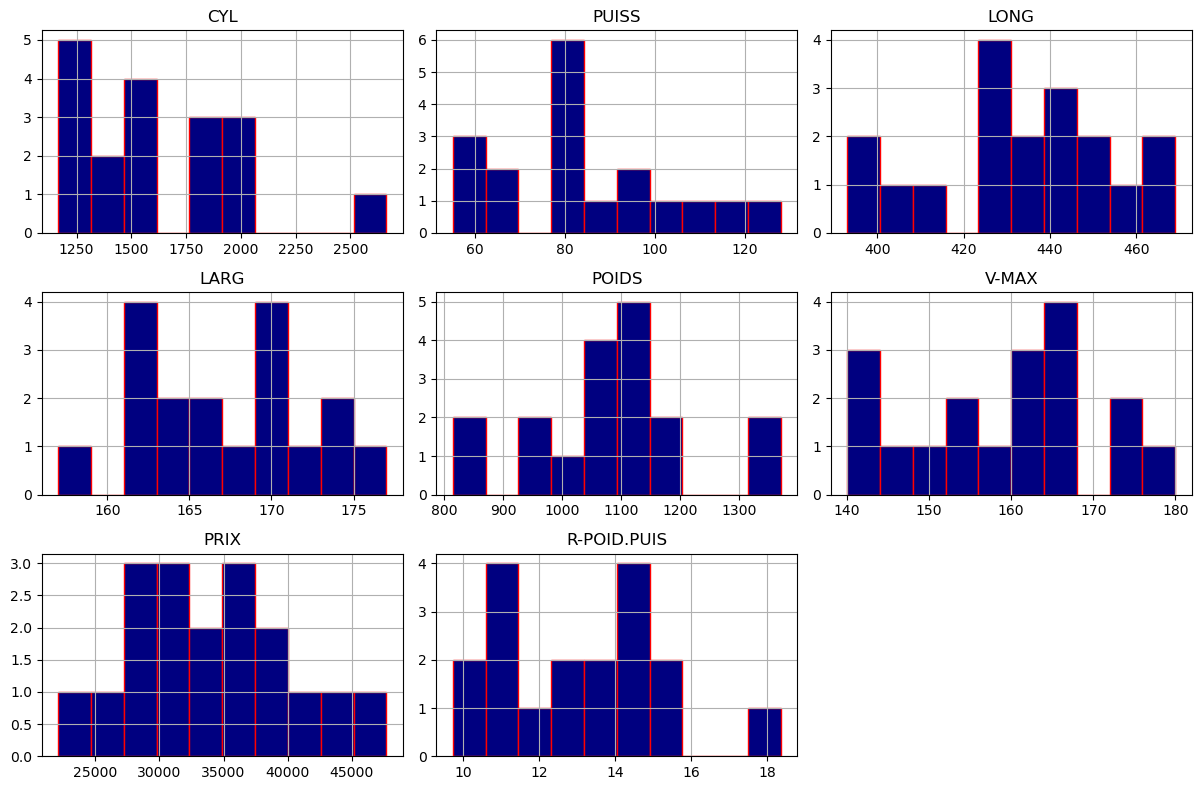

In [10]:
import matplotlib.pyplot as plt

# Trace les histogrammes de chaque variable
df.hist(figsize=(12, 8), bins=10, color='navy', edgecolor='red')
plt.tight_layout()
plt.show()

- CYL (Cylindrée) :
   La cylindrée des moteurs des modèles de véhicules varie entre environ 1166 cc et 2664 cc. La majorité des modèles semblent avoir une cylindrée comprise entre 1300 cc et 2000 cc.

- PUISS (Puissance) :
   La puissance des moteurs des modèles de véhicules est répartie entre environ 55 ch et 128 ch. La distribution semble être plutôt uniforme, bien que certains modèles présentent une puissance nettement supérieure à la moyenne.

- LONG (Longueur) :
   Les modèles de véhicules ont une longueur qui varie entre environ 390 cm et 470 cm. La majorité des modèles semblent avoir une longueur autour de 430 cm.

- LARG (Largeur) :
   La largeur des modèles de véhicules varie entre environ 155 cm et 175 cm. La distribution semble être relativement uniforme, bien que certains modèles aient une largeur légèrement plus grande ou plus petite que la moyenne.

- POIDS (Poids) :
   Le poids des modèles de véhicules est réparti entre environ 800 kg et 1400 kg. La majorité des modèles semblent avoir un poids compris entre 1000 kg et 1200 kg.

- V-MAX (Vitesse maximale) :
   La vitesse maximale des modèles de véhicules varie entre environ 140 km/h et 180 km/h. La distribution semble être relativement uniforme, bien que certains modèles aient une vitesse maximale nettement supérieure à la moyenne.

- PRIX (Prix) :
   Les prix des modèles de véhicules sont répartis entre environ 22000 € et 48000 €. La majorité des modèles semblent avoir un prix compris entre 28000 € et 40000 €.

- R-POID.PUIS (Ratio poids/puissance) :
   Le ratio poids/puissance des modèles de véhicules varie entre environ 9 et 19. Certains modèles ont un ratio poids/puissance relativement faible, ce qui suggère une meilleure performance par rapport au poids du véhicule.

#### b) Analyse bivariée

- **Matrice de corrélation**

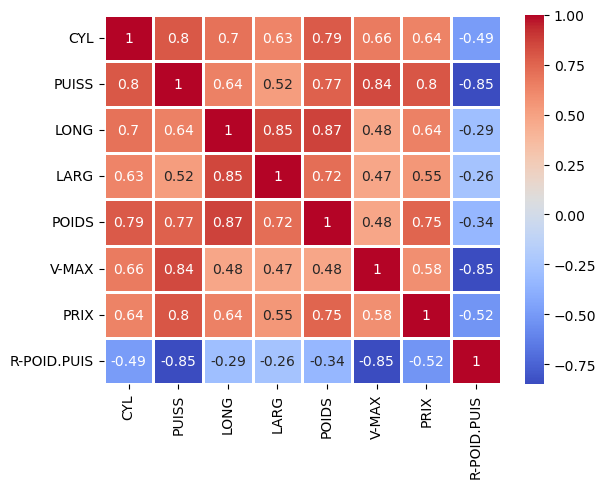

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, linewidth = 0.9)
plt.show()

- **Application de l'Analyse en Composantes Principales (ACP)**

Comme les données sont exprimées dans des unités différentes, nous allons réaliser une ACP normée. Nous allons alors retrancher la moyenne à chaque variable puis de diviser par son écart type. Cela a pour but de rendre les variables comparables en terme d'échelle et de variance.

**Standardisation des données**

In [24]:
#importation de la classe StandardScaler de la bibliothèque scikit-learn
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(df)

import pandas as pd

# Crée un DataFrame à partir de la matrice Z avec les noms de colonnes
Z_df = pd.DataFrame(Z, columns=df.columns)

# Affiche le DataFrame Z
print(Z_df)

         CYL     PUISS      LONG      LARG     POIDS     V-MAX      PRIX  \
0  -0.775099 -0.283358 -1.885081 -1.097345 -1.569007  0.569760 -0.561912   
1  -0.120163  0.019639  1.605810  2.001041  0.234161  0.145972  0.913091   
2  -0.929201 -0.838852 -0.442179  0.258199 -0.216631 -0.532090 -0.713797   
3  -1.127333 -1.293348 -1.000722 -1.097345 -1.118215 -0.616848 -0.925183   
4  -0.128419  0.676132  0.255999 -0.516398  0.196595  0.569760  0.116088   
5  -0.920946 -0.131860 -0.209453  0.451848  0.008765  0.145972  0.206906   
6   0.452217 -0.283358  0.721451  0.451848  0.609821 -0.362575 -0.291025   
7  -0.183455 -1.495346 -0.442179 -0.710047 -0.517159 -1.549183 -0.338000   
8   2.840806  2.191116  0.861086  1.226445  1.811934  1.841127  2.120339   
9  -1.281436 -1.495346 -1.605810 -1.871942 -1.982233 -1.549183 -1.192938   
10 -0.169696  1.231626 -0.255999 -0.903696 -0.141499  1.417338  1.289671   
11  0.457721 -0.131860  0.535270  1.032796  0.609821 -0.023544 -0.026401   
12  1.008087

- On vérifie ici si la moyenne tend bien vers 0 et l'écart-type vers 1

In [13]:
#vérification - librairie numpy
import numpy as np

#moyenne
print("Les moyennes de chaque colonne des données standarisées sont :",np.mean(Z,axis=0))

#écart-type
print("Les écarts-type de chaque colonne des données standarisées sont :",np.std(Z,axis=0))

Les moyennes de chaque colonne des données standarisées sont : [-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16  2.96059473e-16  2.15876699e-17]
Les écarts-type de chaque colonne des données standarisées sont : [1. 1. 1. 1. 1. 1. 1. 1.]


- Application de l'ACP et calcul du nombre de composante

In [25]:
#importation de la classe decomposition de la bibliothèque scikit-learn pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA()

#calculs
coord = acp.fit_transform(Z)
df_coord = pd.DataFrame(coord, columns=[f'PC{i+1}' for i in range(acp.n_components_)])

#nombre de composantes calculées
print(acp.n_components_)
print(df_coord)

8
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -1.722673  2.488722  0.290790  0.183057  0.424781  0.204961  0.153553   
1   1.658430 -1.417662  0.746361  1.391418  0.210388  0.086559 -0.453427   
2  -1.579437 -0.834077  0.377013  0.328535  0.061349 -0.043579  0.547116   
3  -2.955380 -0.011315 -0.025379 -0.006828  0.232978 -0.499708  0.106575   
4   0.716145  0.970907 -0.165428  0.089733 -0.620114 -0.268119 -0.070235   
5  -0.195457 -0.011290  0.129302  0.942320  0.035783  0.004432  0.483093   
6   0.252644 -1.313837  0.204513 -0.436328 -0.183176 -0.106055 -0.020405   
7  -2.600528 -1.784034 -0.719058 -0.579778  0.699538 -0.351835 -0.180143   
8   5.089162  0.480420 -0.538390 -0.893361  0.848479  0.255936  0.161174   
9  -4.169481  0.646119 -0.373202 -0.135326  0.084161  0.149319 -0.541060   
10  1.409926  2.334666 -0.800736  0.599228  0.014113 -0.451187 -0.081439   
11  0.720049 -1.150795  0.451445 -0.104528  0.153704  0.122893  0.222126   
12  3.3094

- Calcul du pourcentage de variance expliquée par nos axes

In [9]:
# Liste des composantes principales
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8"]

# Variance expliquée
variance_explic = acp.explained_variance_

# Total de la variance expliquée
total_variance = sum(variance_explic)

# Crée un DataFrame pour les composantes principales et leur variance expliquée
df_acp = pd.DataFrame(list_acp, columns=["ACP"])
df_acp['explained_variance'] = acp.explained_variance_

# Calcule la variance expliquée en pourcentage
variance_explic_perc = (variance_explic / total_variance) * 100

# Ajoute la colonne pourcentage au DataFrame
df_acp['explained_variance_perc'] = variance_explic_perc

print(df_acp)

   ACP  explained_variance  explained_variance_perc
0  CP1            5.806427                68.548099
1  CP2            1.412714                16.677871
2  CP3            0.494697                 5.840170
3  CP4            0.359789                 4.247512
4  CP5            0.198850                 2.347534
5  CP6            0.115929                 1.368603
6  CP7            0.076950                 0.908441
7  CP8            0.005232                 0.061770


- Représentation graphique

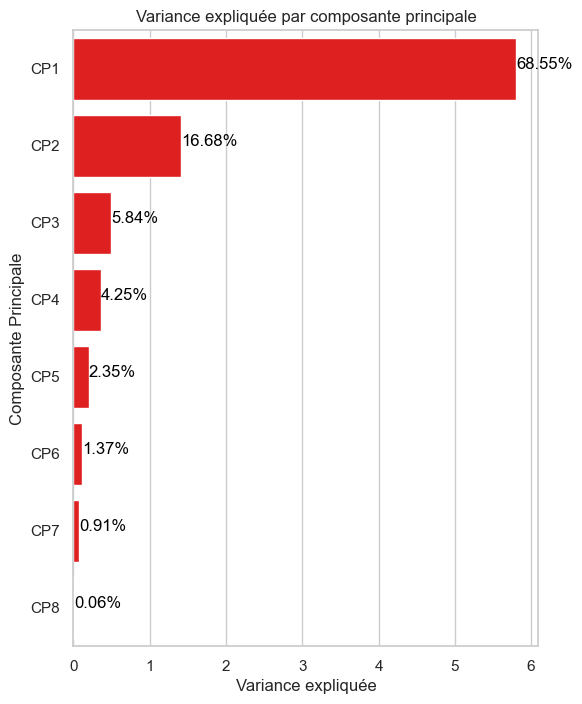

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure le style de seaborn
sns.set(style="whitegrid")

# Initialise la figure matplotlib
f, ax = plt.subplots(figsize=(6, 8))

# Tracer des barres avec les pourcentages
sns.barplot(x="explained_variance", y="ACP", data=df_acp,
            label="Total", color="red")

# Affiche les pourcentages au-dessus des barres
for index, row in df_acp.iterrows():
    ax.text(row['explained_variance'], index, f"{row['explained_variance_perc']:.2f}%",
            color='black', ha="left")

# Affiche le graphique
plt.xlabel('Variance expliquée')
plt.ylabel('Composante Principale')
plt.title('Variance expliquée par composante principale')
plt.show()

On observe qu'avec les deux premières composantes, on explique environ 85% de l'information. On décide ensuite d'utiliser le critère du coude pour déterminer le nombre de composantes à retenir.

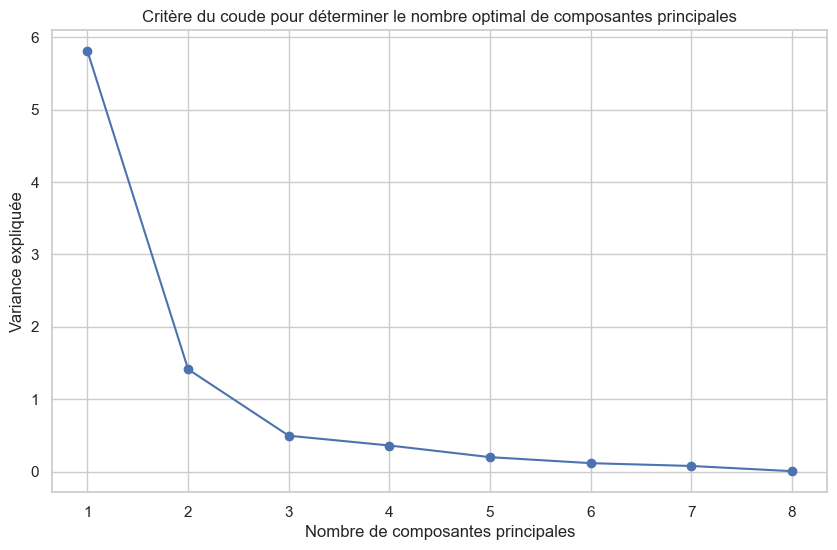

In [19]:
# Nombre de composantes principales
num_components = len(variance_explic)

# Indices des composantes principales
components_indices = np.arange(1, num_components + 1)

# Tracer du graphique du critère du coude
plt.figure(figsize=(10, 6))
plt.plot(components_indices, variance_explic, marker='o', linestyle='-')
plt.title('Critère du coude pour déterminer le nombre optimal de composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée')
plt.xticks(components_indices)
plt.grid(True)
plt.show()

On observe une importante cassure au niveau de la deuxième composante donc on choisit de retenir les 2 premières composantes qui expliquent environ 85% de l'information.

### Analyse des individus

Nous positionnons maintenant les individus (véhicules) dans le premier plan factoriel avec leurs labels pour situer et comprendre les proximités entre eux.

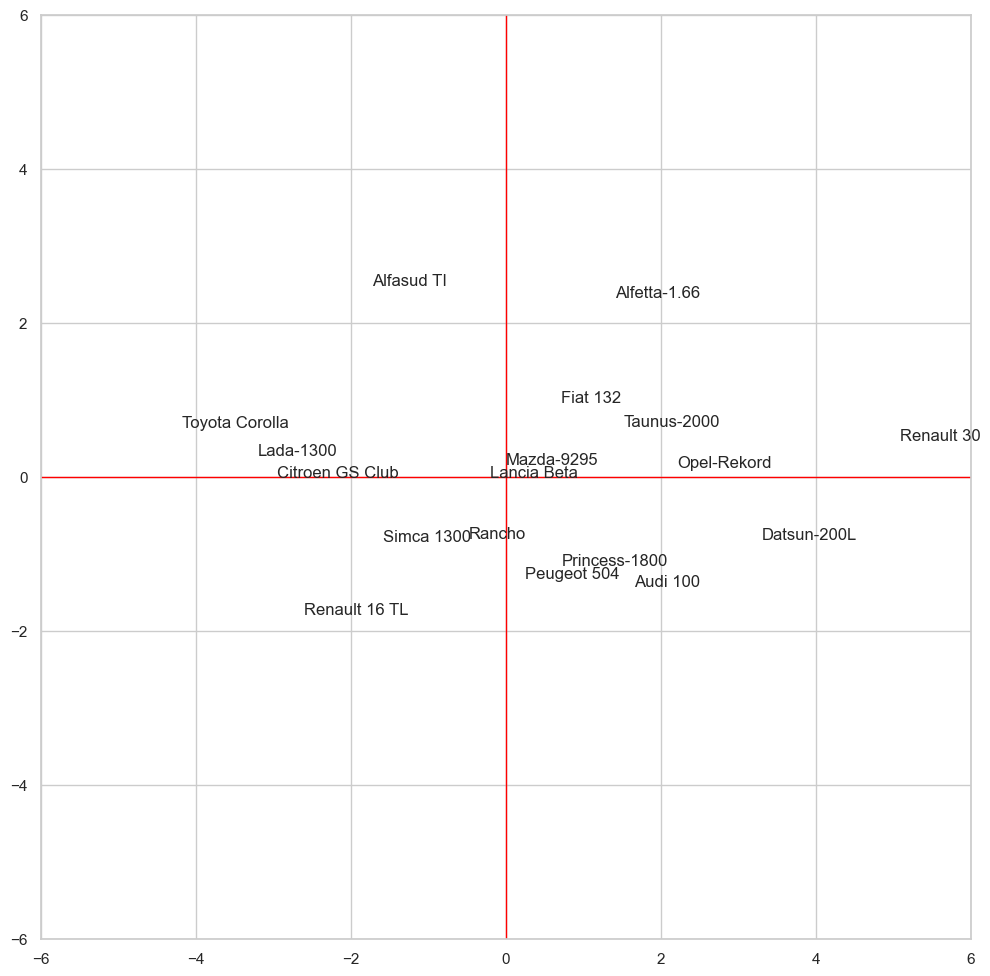

In [20]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(18):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='red',linestyle='-',linewidth=1)
#affichage
plt.show()

Nous allons tout d'abord la contribution de chaque individu à la création des composante principale. Seul les individus avec une contribution supérieur à la moyenne seront interprétables. En ce qui concerne les autres, ils le sont peut être sur d'autres plans (CP3 etc...). 
Qualité de représentation – Les COS² (cosinus carré). Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale.

- Filtrer les individus avec d_i > à la moyenne de d_i
- Afficher les ID des ces individus
- Combien d'individus pourront être exploités? Ou se trouvent ces individus dans notre plan?

In [21]:
di = np.sum(Z**2,axis=1)
df_ctr_ind = pd.DataFrame({'ID':df.index,'d_i':di})
df_ctr_ind

,ID,d_i
0,Alfasud TI,9.538247
1,Audi 100,7.510645
2,Simca 1300,3.752924
3,Citroen GS Club,9.050548
4,Fiat 132,1.952761
5,Lancia Beta,1.177782
6,Peugeot 504,2.076653
7,Renault 16 TL,11.450449
8,Renault 30,28.030981
9,Toyota Corolla,18.282113


In [22]:
df_ctr_ind[df_ctr_ind['d_i'] > df_ctr_ind.d_i.mean()]

,ID,d_i
0,Alfasud TI,9.538247
3,Citroen GS Club,9.050548
7,Renault 16 TL,11.450449
8,Renault 30,28.030981
9,Toyota Corolla,18.282113
10,Alfetta-1.66,8.654128
12,Datsun-200L,13.818590
17,Lada-1300,11.645511


Ce que nous venons de voir correspond à la contribution de chaque individus pour l'ensemble de l'ACP. Nous nous sommes retreint à deux composantes. Nous allons calculer la contribution de chaque individus dans notre plan CP1 et CP2. Puis nous déduirons les individus interprétable dans ce plan.

- Filtrer les individus avec une contribtuions supérieur à la moyenne pour la CP1
- Idem pour la CP2
- Afficher ces individus

In [32]:
#contributions aux axes
vp = (18-1)/18*acp.explained_variance_

ctr = coord**2
for j in range(8):
    ctr[:,j] = ctr[:,j]/(18*eigval[j])

df_ctr_cp1cp2 = pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

In [33]:
df_ctr_cp1cp2[df_ctr_cp1cp2['CTR_1'] > df_ctr_cp1cp2.CTR_1.mean()]

,id,CTR_1,CTR_2
3,Citroen GS Club,0.088485,0.000005
7,Renault 16 TL,0.068512,0.132527
8,Renault 30,0.262382,0.009610
9,Toyota Corolla,0.176119,0.017383
12,Datsun-200L,0.110957,0.027501
17,Lada-1300,0.103305,0.003200


In [34]:
df_ctr_cp1cp2[df_ctr_cp1cp2['CTR_2'] > df_ctr_cp1cp2.CTR_2.mean()]

,id,CTR_1,CTR_2
0,Alfasud TI,0.030064,0.257899
1,Audi 100,0.027864,0.083684
6,Peugeot 504,0.000647,0.071875
7,Renault 16 TL,0.068512,0.132527
10,Alfetta-1.66,0.020139,0.226958


Les individus ne sont pas tous bien représentés sur nos composantes principales. Dans un premier temps nous avons afficher tous les individus sur nos axes CP1 & CP2. Nous voulons juste afficher ceux qui seront interprétables. Pour cela nous allons calculer la qualité de représentations d'un individus dans le plan CP1 & CP2.

- Filtrer les individus ayant une bonne représentation sur l'axe 1
- Filtrer les individus ayant une bonne représentation sur l'axe 2
- Afficher les individus bien représenté sur l'axe1 et axe 2.

In [35]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(8):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_12 = pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
df_ctr_12

,id,COS2_1,COS2_2
0,Alfasud TI,0.311127,0.649358
1,Audi 100,0.366199,0.267589
2,Simca 1300,0.664714,0.185371
3,Citroen GS Club,0.965055,0.000014
4,Fiat 132,0.262635,0.482732
5,Lancia Beta,0.032437,0.000108
6,Peugeot 504,0.030736,0.831225
7,Renault 16 TL,0.590610,0.277961
8,Renault 30,0.923962,0.008234
9,Toyota Corolla,0.950906,0.022835


In [36]:
df_ctr_12[df_ctr_12['COS2_1'] > df_ctr_12.COS2_1.mean()]

,id,COS2_1,COS2_2
2,Simca 1300,0.664714,0.185371
3,Citroen GS Club,0.965055,0.000014
7,Renault 16 TL,0.590610,0.277961
8,Renault 30,0.923962,0.008234
9,Toyota Corolla,0.950906,0.022835
12,Datsun-200L,0.792594,0.047796
13,Taunus-2000,0.667767,0.122029
16,Opel-Rekord,0.704163,0.002194
17,Lada-1300,0.875626,0.006600


In [37]:
df_ctr_12[df_ctr_12['COS2_2'] > df_ctr_12.COS2_2.mean()]

,id,COS2_1,COS2_2
0,Alfasud TI,0.311127,0.649358
1,Audi 100,0.366199,0.267589
4,Fiat 132,0.262635,0.482732
6,Peugeot 504,0.030736,0.831225
7,Renault 16 TL,0.590610,0.277961
10,Alfetta-1.66,0.229704,0.629834
11,Princess-1800,0.241033,0.615672


In [38]:
filtre_1 = df_ctr_12['COS2_1'] > df_ctr_12['COS2_1'].mean()
resultat_1 = df_ctr_12[filtre_1]['id']

filtre_2 = df_ctr_12['COS2_2'] > df_ctr_12['COS2_2'].mean()
resultat_2 = df_ctr_12[filtre_2]['id']

resultat_concatene = pd.concat([resultat_1, resultat_2]).drop_duplicates()

# Réinitialisation des index
resultat_final = resultat_concatene.reset_index(drop=True)
resultat_final

0          Simca 1300
1     Citroen GS Club
2       Renault 16 TL
3          Renault 30
4      Toyota Corolla
5         Datsun-200L
6         Taunus-2000
7         Opel-Rekord
8           Lada-1300
9          Alfasud TI
10           Audi 100
11           Fiat 132
12        Peugeot 504
13       Alfetta-1.66
14      Princess-1800
Name: id, dtype: object

Nous avons une idée des individus que nous allons pouvoir étudier. La prochaine étape est de caractériser nos composantes principales. Pour rappel, chaque composante est composé d'une combinaison linéaire des variables corrélés de notre jeu de données d'entré. Chaque composante est décorrélé.

- Analyser le cercle des corrélation et en déduire qu'elles individus seront à droite de l'axe 1 et les individus à gauche
- Analyser le cercle des corrélation et en déduire qu'elles individus seront en haut de l'axe 2 et les individus en bas

In [39]:
#racine carrée des valeurs propres
sqrt_vp = np.sqrt(vp)

#corrélation des variables avec les axes
corvar = np.zeros((8,8))
for k in range(8):
    corvar[:,k] = acp.components_[k,:] * sqrt_vp[k]

#affiche la matrice des corrélations variables x facteurs
print(pd.DataFrame(corvar))

          0         1         2         3         4         5         6  \
0  0.870350 -0.075563  0.017553 -0.448874  0.159538  0.058264 -0.077901   
1  0.940410  0.289617 -0.116616 -0.040107 -0.103660  0.045997  0.020527   
2  0.832265 -0.463231  0.110703  0.079225 -0.177697 -0.136930 -0.154574   
3  0.754923 -0.460413  0.370777  0.205054  0.120357  0.145567  0.053555   
4  0.873787 -0.358177 -0.201730 -0.100532 -0.171783 -0.001950  0.165299   
5  0.805344  0.472372  0.251711  0.009024  0.113744 -0.211946  0.083485   
6  0.834494 -0.011571 -0.437698  0.259273  0.206490 -0.014228 -0.042269   
7 -0.686244 -0.683022 -0.089120 -0.104735  0.143030 -0.137516  0.057825   

          7  
0  0.008297  
1 -0.057095  
2  0.000181  
3 -0.006697  
4  0.023801  
5  0.004198  
6  0.007560  
7 -0.030442  


In [40]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

            id     COR_1     COR_2
0          CYL  0.870350 -0.075563
1        PUISS  0.940410  0.289617
2         LONG  0.832265 -0.463231
3         LARG  0.754923 -0.460413
4        POIDS  0.873787 -0.358177
5        V-MAX  0.805344  0.472372
6         PRIX  0.834494 -0.011571
7  R-POID.PUIS -0.686244 -0.683022


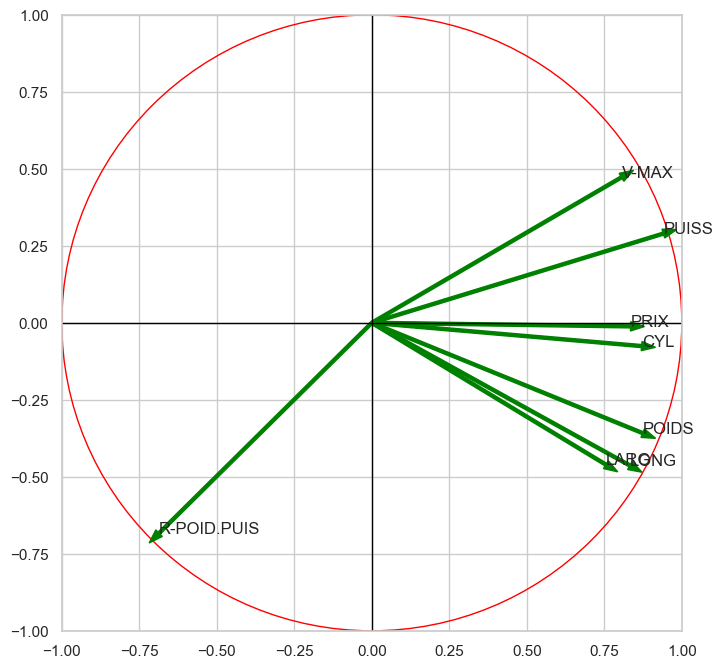

In [50]:
import matplotlib.pyplot as plt

# cercle des corrélations
fig, axes = plt.subplots(figsize=(8, 8))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# affichage des étiquettes (noms des variables)
for j in range(8):
    plt.annotate(df.columns[j], (corvar[j, 0], corvar[j, 1]))

# ajoute les axes
plt.plot([-1, 1], [0, 0], color='black', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='black', linestyle='-', linewidth=1)

# ajoute un cercle
cercle = plt.Circle((0, 0), 1, color='red', fill=False)
axes.add_artist(cercle)

# affiche les flèches reliant les variables à l'origine
for j in range(8):
    plt.arrow(0, 0, corvar[j, 0], corvar[j, 1], color='green', width=0.01)

# affichage
plt.show()


On retrouvera a droite des individus avec un prix, cylindre, poids, puissance, large, long élevé. A gauche un prix, cylindre, poids, puissance, large, long faible. On retrouvera des individus avec R-Poid.puis élevé en bas et faible en haut.

On perçoit clairement l’effet taille sur le premier axe : les voitures puissantes et rapides sont aussi les plus lourdes et imposantes, la relation globale entre les variables est en réalité déterminée par la cylindrée (CYL).

Nous allons maintenant étudier la qualité de représentation de chaque variable.

Filtrer les variables avec un taux de représentation supérier à la moyenne sur l'axe 1
Filtrer les variables avec un taux de représentation supérier à la moyenne sur l'axe 2
Afficher les variables
Affiner l'analyse de la question 11

In [51]:
#cosinus carré des variables
cos2var = corvar**2
df_ctr_variables = pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})

In [52]:
df_ctr_variables[df_ctr_variables['COS2_1'] > df_ctr_variables['COS2_1'].mean()]

,id,COS2_1,COS2_2
0,CYL,0.757509,0.005710
1,PUISS,0.884372,0.083878
2,LONG,0.692665,0.214583
4,POIDS,0.763504,0.128291
6,PRIX,0.696379,0.000134


In [53]:
df_ctr_variables[df_ctr_variables['COS2_2'] > df_ctr_variables['COS2_2'].mean()]

,id,COS2_1,COS2_2
2,LONG,0.692665,0.214583
3,LARG,0.569908,0.211981
5,V-MAX,0.648579,0.223135
7,R-POID.PUIS,0.470931,0.466518


On associera la CP1 à CYL, PUSS, LONG, POIDS & PRIX. On associera la CP2 à R-POD PUIS et dans une moindre mesur LONG, LARG, V-MAX.

## K-means

- Choix du nombre de cluster : On utilise le critère du coude une nouvelle fois pour le choix du nombre de cluster.

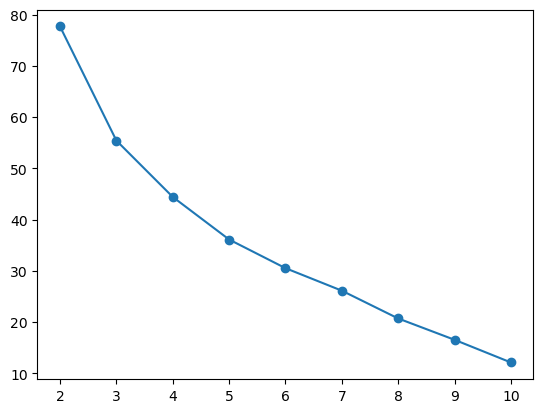

In [26]:
cluster_range=[2,3,4,5,6,7,8,9,10]
inertie=[]

for c in cluster_range:
    kmeans=KMeans(init='k-means++',n_clusters=c).fit(Z)
    inertie.append(kmeans.inertia_)

#pour rappel Z correspond à nos données centrées_réduites    
#print(inertie)

#dessine les inerties calculées
plt.Figure()
plt.plot(cluster_range,inertie,marker='o')
plt.show()

La cassure est nettement visible à partir du rang 3 donc on choisit 3 clusters.

In [27]:
#On part sur 3 clusters
kmeans=KMeans(n_clusters=3).fit(df)

#affecte les clusters à la variable labels
clusters=kmeans.labels_

#crée un dataset qui contient les valeurs de Z
new_df=pd.DataFrame(data=df,columns=['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'V-MAX', 'PRIX', 'R-POID.PUIS'])

#rajoute les labels à mon dataset new_df_Z
new_df['clusters']=clusters

new_df

,CYL,PUISS,LONG,LARG,POIDS,V-MAX,PRIX,R-POID.PUIS,clusters
Modele,,,,,,,,,
Alfasud TI,1350,79,393,161,870,165,30570,11.012658,1
Audi 100,1588,85,468,177,1110,160,39990,13.058824,0
Simca 1300,1294,68,424,168,1050,152,29600,15.441176,2
Citroen GS Club,1222,59,412,161,930,151,28250,15.762712,2
Fiat 132,1585,98,439,164,1105,165,34900,11.275510,1
Lancia Beta,1297,82,429,169,1080,160,35480,13.170732,1
Peugeot 504,1796,79,449,169,1160,154,32300,14.683544,1
Renault 16 TL,1565,55,424,163,1010,140,32000,18.363636,1
Renault 30,2664,128,452,173,1320,180,47700,10.312500,0


Affichage de la médiane ou la moyenne dans chaque cluster.

In [15]:
df_clusters = new_df.groupby(['clusters']).mean().round(0)    # ou .median()
df_clusters

,CYL,PUISS,LONG,LARG,POIDS,V-MAX,PRIX,R-POID.PUIS
clusters,,,,,,,,
0,1670.0,84.0,434.0,168.0,1073.0,160.0,33369.0,13.0
1,1852.0,103.0,450.0,169.0,1198.0,164.0,42703.0,12.0
2,1349.0,67.0,416.0,162.0,969.0,150.0,26878.0,15.0


In [28]:
for i in range(3):
    print(f'clusters {i}')
    print(new_df[new_df.clusters == i].index.tolist())

clusters 0
['Audi 100', 'Renault 30', 'Alfetta-1.66', 'Datsun-200L', 'Rancho']
clusters 1
['Alfasud TI', 'Fiat 132', 'Lancia Beta', 'Peugeot 504', 'Renault 16 TL', 'Princess-1800', 'Taunus-2000', 'Opel-Rekord']
clusters 2
['Simca 1300', 'Citroen GS Club', 'Toyota Corolla', 'Mazda-9295', 'Lada-1300']


## Utilisation de l'ACP pour visualiser les données

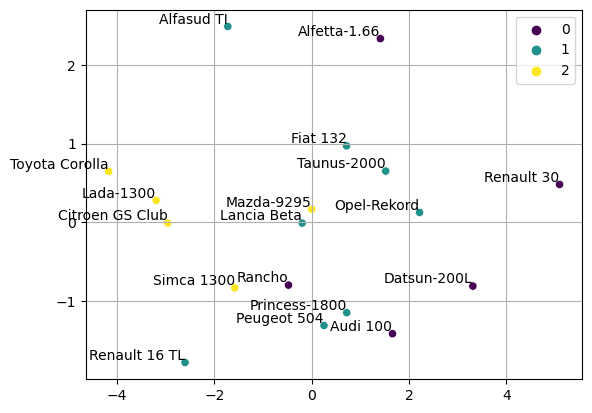

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# application de l'acp pour avoir 2 composants qui nous permettent d'avoir 85% de l'information
pca = PCA(n_components=2).fit(Z)
Zk_projected = pca.transform(Z)

#plt.plot([-6,6],[0,0],color='red',linestyle='-',linewidth=1)
#plt.plot([0,0],[-6,6],color='red',linestyle='-',linewidth=1)

plt.grid(True)

# affichage de la projection avec les noms des individus

sns.scatterplot(data=Zk_projected, x=Zk_projected[:, 0], y=Zk_projected[:, 1], palette='viridis', alpha=1, hue=clusters)

for i, txt in enumerate(df.index):  # boucle sur les noms des individus
    plt.text(Zk_projected[i, 0], Zk_projected[i, 1], txt, ha='right', va='bottom')  # annoter avec le nom de l'individu
plt.legend()
plt.show()

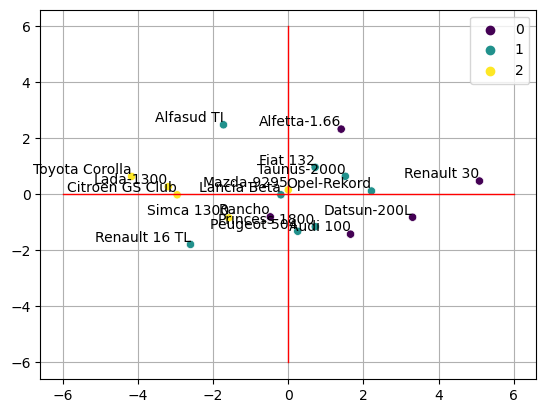

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# application de l'acp pour avoir 2 composants qui nous permettent d'avoir 85% de l'information
pca = PCA(n_components=2).fit(Z)
Zk_projected = pca.transform(Z)

plt.plot([-6,6],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='red',linestyle='-',linewidth=1)

plt.grid(True)

# affichage de la projection avec les noms des individus

sns.scatterplot(data=Zk_projected, x=Zk_projected[:, 0], y=Zk_projected[:, 1], palette='viridis', alpha=1, hue=clusters)

for i, txt in enumerate(df.index):  # boucle sur les noms des individus
    plt.text(Zk_projected[i, 0], Zk_projected[i, 1], txt, ha='right', va='bottom')  # annoter avec le nom de l'individu
plt.legend()
plt.show()